In [2]:
# >>> Légende
# "##" : "pas besoin de comprendre les détails"
# "#"   : "posez la question si vous ne comprenez pas !"

# >>> Les réponses aux questions sont dans la feuille "Réponses", à ne pas réveler avant d'avoir cherché par soi-même !

In [3]:
## Tous les imports nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [4]:
## Fonction permettant de recueillir les données dans "points.arff"
def loadArfffile():
    f=open("points.arff",'r')
    for i in range(0,7):
        f.readline()
    data=[]    
    b=f.readline()
    while b!="":
        a = b[:-1].split(',')
        a[0]=float(a[0])
        a[1]=float(a[1])
        data = data + [a]
        b=f.readline()
    f.close()
    return np.array(data)

# Stockage des données dans "data"
data = loadArfffile()

In [5]:
# Que fait la fonction "Arfffile" ?
#
#                           +----------------+
#  Le fichier               |                |             La sortie de la fonction
#  "points.arfff"   ----->  |  loadArfffile  |  ------->   (sous quelle forme ?)
#  (par exemple)            |                |             A vous de le découvrir !
#                           +----------------+
#

In [6]:
# 1.> A vous de jouer !
# Le but ici est d'afficher et de comprendre ce qu'a renvoyé la fonction "loadArfffile"
# Indice : utiliser la fonction "print" permet d'afficher des données
# Syntaxe : "print(quelquechose)" va afficher les données contenues dans "quelquechose"
# Votre code ici :

# > Réponse : "print(data)"

In [7]:
# Problème : Ce n'est pas très lisible ni pratique par un humain !
# Idée : Afficher les données dans un graphe.

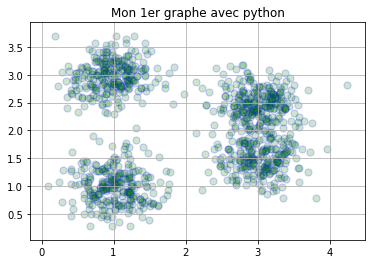

In [8]:
## Création du graphe
fig, ax = plt.subplots()
for x, y in data:
    ax.scatter(x, y, color='green', s=50, alpha=0.2, edgecolors='blue')
ax.set_title('Mon 1er graphe avec python')
ax.grid(True)
plt.show()

# 2.> A vous de jouer !
# Indice : Pour répondre à ces 6 questions, changez le code, testez, itérez !

# A quoi sert le paramètre "color" ?
# 2.1> Réponse : A déterminer la couleur des points

# A quoi sert le paramètre "s" ?
# 2.2> Réponse : A déterminer l'échelle des points

# A quoi sert le paramètre "alpha" ?
# 2.3> Réponse : A déterminer la transparence des points

# A quoi sert le paramètre "edgecolors" ?
# 2.4> Réponse : A déterminer la couleur des contours des points

# A quoi sert la ligne "ax.set_title('Mon 1er graphe avec python')" ?
# 2.5> Réponse : A ajouter le titre 'Mon 1er graphe avec python'

# A quoi sert la ligne "ax.grid(True)" ?
# 2.6> Réponse : A afficher la grille de fond

In [9]:
# Observation : On observe 3 "tas de points".
# Problème : L'ordinateur ne sait pas que ces 3 groupes existent.
# Objectif : L'aider à créer des groupes, des "clusters" de points pour pouvoir ensuite les traiter.

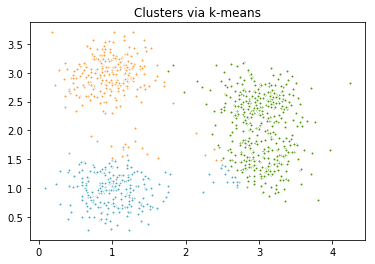

In [10]:
# 3.> A vous de jouer !
# A quoi servent ces 2 lignes selon vous ? Comment vérifier vos hypothèses ?
# > Réponse :
# "nb_clusters" représente le nombre de clusters
# "init_means" représente les coordonées des centres initiaux
# Quels sont les paramètres les mieux adaptés ?
nb_clusters = 3
init_means = np.array([[1,1],[1,3],[3,2]])

# 4.> A vous de jouer !
# A quoi servent les différents paramètres selon vous ? Comment vérifier vos hypothèses ?
# > Réponse :
# "init" représente les centres initiaux
# "n_clusters" le nombre de clusters utilisés
# "n_init" le nombre d'initialisations essayées
k_means = KMeans(init="random", n_clusters=nb_clusters, n_init=10,  max_iter=100)
k_means.fit(data)

## Mise en place du graphe
fig, ax = plt.subplots()

# 5.> A vous de jouer !
# Que veulent dire ces codes avec des # selon vous ? Comment vérifier votre hypothèse ?
# > Réponse : Ce sont des codes héxadécimaux codant les différentes couleurs utilisées pour le graphe.
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'black', 'cyan', 'red', 'yellow']

# 6.> A vous de jouer !
# Que représentent "k_means_cluster_centers" et "k_means_labels" selon vous ? Comment vérifier votre hypothèse ?
# > Réponse :
# "k_means_cluster_centers" représente les coordonnées des centres des clusters
# "k_means_labels" représente l'appartenance des points à l'un des clusters
# Pour le voir utilisez "print" bien sûr ! ("print(k_means_cluster_centers)" et "print(k_means_labels)")
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(data, k_means_cluster_centers)

## Affichage du graphe adapté
for k, col in zip(range(nb_clusters), colors):
    # 7.> A vous de jouer !
    # Quel est la signification de "my_members" ?
    # Indice : "==" permet de tester si les 2 membres sont égaux ou non (True ou False)
    # > Réponse : Il permet de coder si le point est dans le cluster k ou non
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ## Affichage des clusters
    ax.plot(data[my_members, 0], data[my_members, 1], 'w', markerfacecolor=col, marker='.')

# 8.> A vous de jouer !
# Maintenant que vous êtes des pros vous le savez : à quoi sert la ligne suivante ?
# > Réponse : A ajouter le titre 'Clusters via k-means'
ax.set_title('Clusters via k-means')


plt.show()